In [61]:
# import Libraries
import numpy as np
import pandas as pd

In [59]:
# import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [55]:
# import Linear Regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error

In [53]:
# import Decision Tree // Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [51]:
# import evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
tataouine_df = pd.read_csv("/Users/tovancao/Ironhack/Group Projects/W7_Group_ML/data tataouine.csv")

## Data Info (Changes Apply)

In [94]:
tataouine_df.head()

,date,WS50M,T2M,PS,WS10M,just_date,day_time,season,hour,doy
0,2013-01-01 01:00:00,2.20,8.83,100.09,1.44,2013-01-01,01:00,4,1,1
1,2013-01-01 02:00:00,2.50,8.48,100.05,1.62,2013-01-01,02:00,4,2,1
2,2013-01-01 03:00:00,2.64,8.10,100.00,1.71,2013-01-01,03:00,4,3,1
3,2013-01-01 04:00:00,2.71,7.70,99.96,1.77,2013-01-01,04:00,4,4,1
4,2013-01-01 05:00:00,2.80,7.40,99.95,1.83,2013-01-01,05:00,4,5,1


In [69]:
tataouine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61343 entries, 0 to 61342
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    61343 non-null  object 
 1   WS50M   61343 non-null  float64
 2   T2M     61343 non-null  float64
 3   PS      61343 non-null  float64
 4   WS10M   61343 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.3+ MB


In [71]:
tataouine_df.shape

(61343, 5)

In [47]:
# checking for nulls

In [73]:
tataouine_df.isnull().sum()

date     0
WS50M    0
T2M      0
PS       0
WS10M    0
dtype: int64

## Feature Engineering & Transformations

**Getting the 'Season' column**
- Spring = 1
- Summer = 2
- Autumn = 3
- Winter = 4

In [75]:
tataouine_df[['just_date', 'day_time']] = tataouine_df['date'].str.split(' ', expand=True)

In [77]:
# Convert the 'date' column to datetime format
tataouine_df['just_date'] = pd.to_datetime(tataouine_df['just_date'], format='%d/%m/%Y')

In [96]:
# Define a function to assign seasons based on the month
def get_season(date):
    month = date.month
    day = date.day

    if (month == 3 and day >= 1) or (month >= 4 and month <= 5):
        return 1
    elif (month == 6 and day >= 1) or (month >= 7 and month <= 8):
        return 2
    elif (month == 9 and day >= 1) or (month >= 10 and month <= 11):
        return 3
    else:
        return 4

# Create a new 'season' column
tataouine_df['season'] = tataouine_df['just_date'].apply(get_season)

**Getting numeric date & hour columns**

In [98]:
tataouine_df['date'] = pd.to_datetime(tataouine_df['date'],format="%d/%m/%Y %H:%M")

In [83]:
# getting a numeric hour

tataouine_df['hour'] = tataouine_df['date'].dt.hour

In [85]:
# getting a numeric day of year (doy)

tataouine_df['doy'] = tataouine_df['date'].dt.dayofyear

In [83]:
# Mau to checkout how to get unique day numbers

## Target & Features

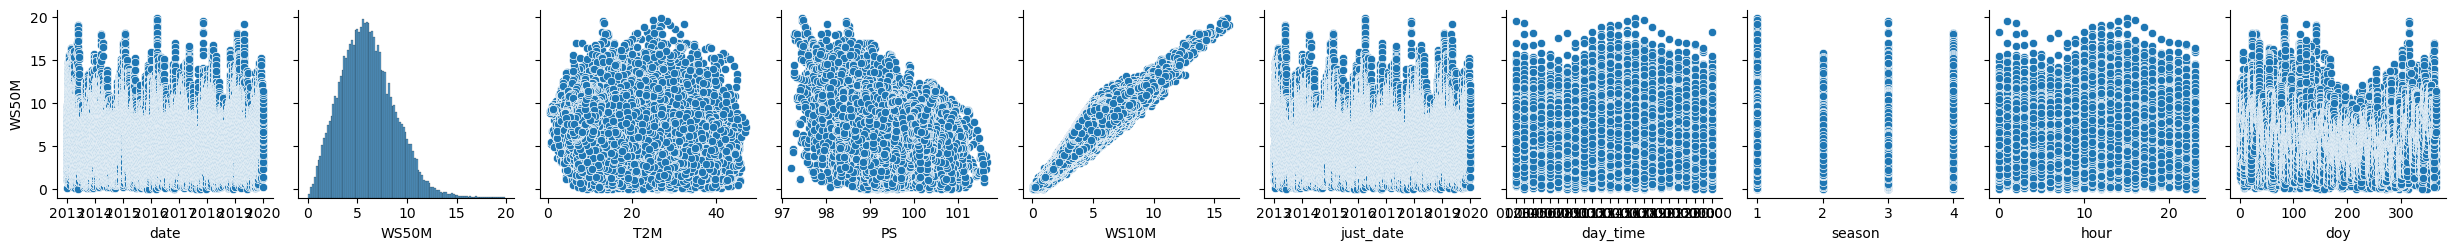

In [106]:
# checking to see the relationships b/w the target & features
sns.pairplot(tataouine_df, y_vars=['WS50M'], x_vars=tataouine_df.columns[:], kind='scatter');

Checking the distributions

<Axes: >

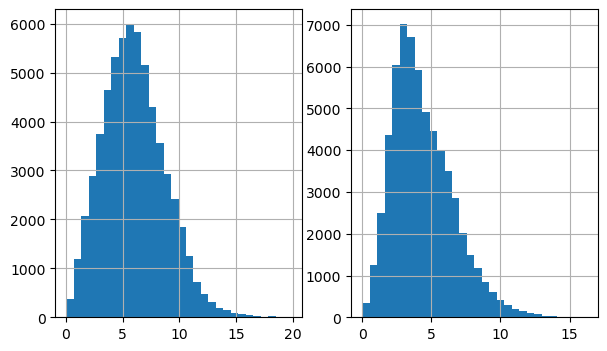

In [104]:
fig, axes = plt.subplots(1,2, figsize=(7,4))
tataouine_df['WS50M'].hist(bins=30,ax = axes[0])
tataouine_df['WS10M'].hist(bins=30,ax = axes[1])

<Axes: >

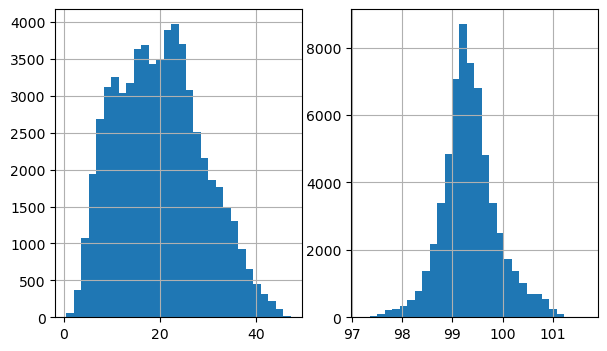

In [108]:
fig, axes = plt.subplots(1,2, figsize=(7,4))
tataouine_df['T2M'].hist(bins=30,ax = axes[0])
tataouine_df['PS'].hist(bins=30,ax = axes[1])

<Axes: >

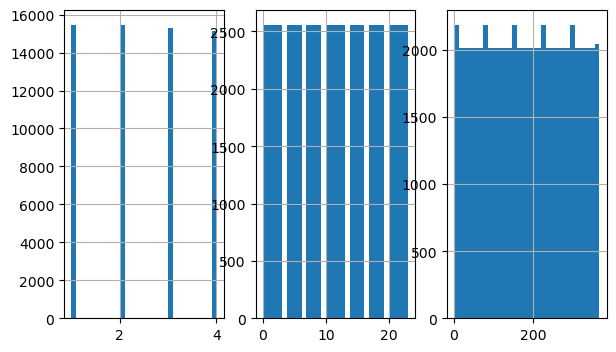

In [110]:
fig, axes = plt.subplots(1,3, figsize=(7,4))
tataouine_df['season'].hist(bins=30,ax = axes[0])
tataouine_df['hour'].hist(bins=30,ax = axes[1])
tataouine_df['doy'].hist(bins=30,ax = axes[2])

**Dropping non-numeric columns**

In [112]:
tataouine_num_df = tataouine_df.drop(columns=['date', 'just_date', 'day_time'])

In [114]:
tataouine_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61343 entries, 0 to 61342
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WS50M   61343 non-null  float64
 1   T2M     61343 non-null  float64
 2   PS      61343 non-null  float64
 3   WS10M   61343 non-null  float64
 4   season  61343 non-null  int64  
 5   hour    61343 non-null  int32  
 6   doy     61343 non-null  int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 2.8 MB


**Feature Selection**

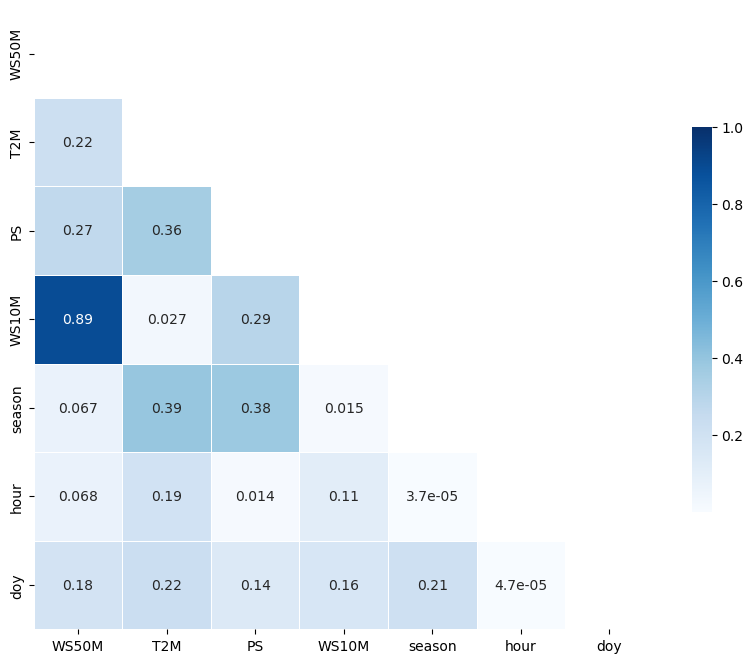

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate absolute correlation matrix
corr = np.abs(tataouine_num_df.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Use a blue color palette for the heatmap
cmap = sns.color_palette("Blues", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=corr, cmap=cmap)

# Show the plot
plt.show()

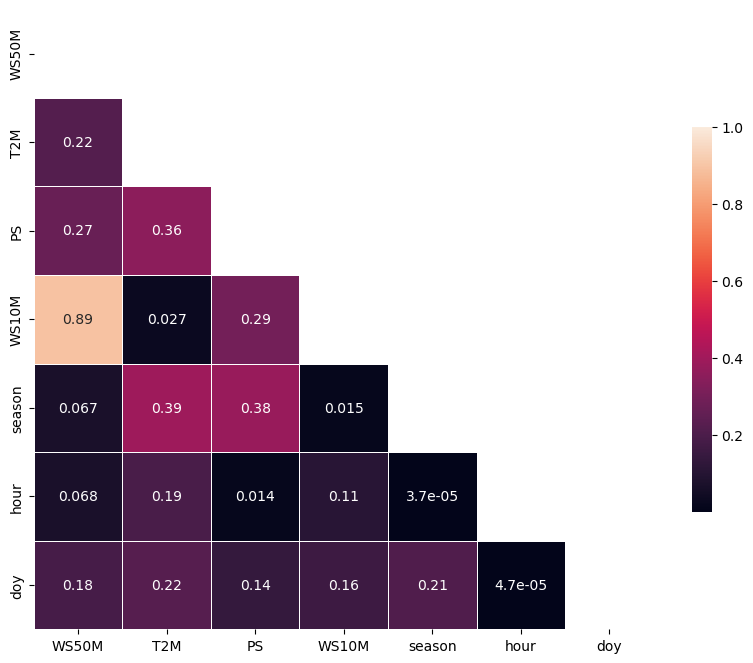

In [116]:
corr=np.abs(tataouine_num_df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

**Creating the training & test sets**

In [118]:
# remember to re-run this cell if new features are added [!!!]

features = tataouine_num_df.drop(columns = ["WS50M"])
target = tataouine_num_df["WS50M"]

In [120]:
# getting the training & test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

**Standardizing with StandarScaler**

In [122]:
# initialize scaler
scaler = StandardScaler()

In [124]:
# fit the model to the training data exclusively // transform X_train
X_train_norm = scaler.fit_transform(X_train)

In [126]:
# transform X_test
X_test_norm = scaler.transform(X_test)

turning transformations arrays back into a dataframe object -> This is needed for random forest feature calculation [!!!]

In [128]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
#X_train_norm.head()

In [130]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
#X_test_norm.head()

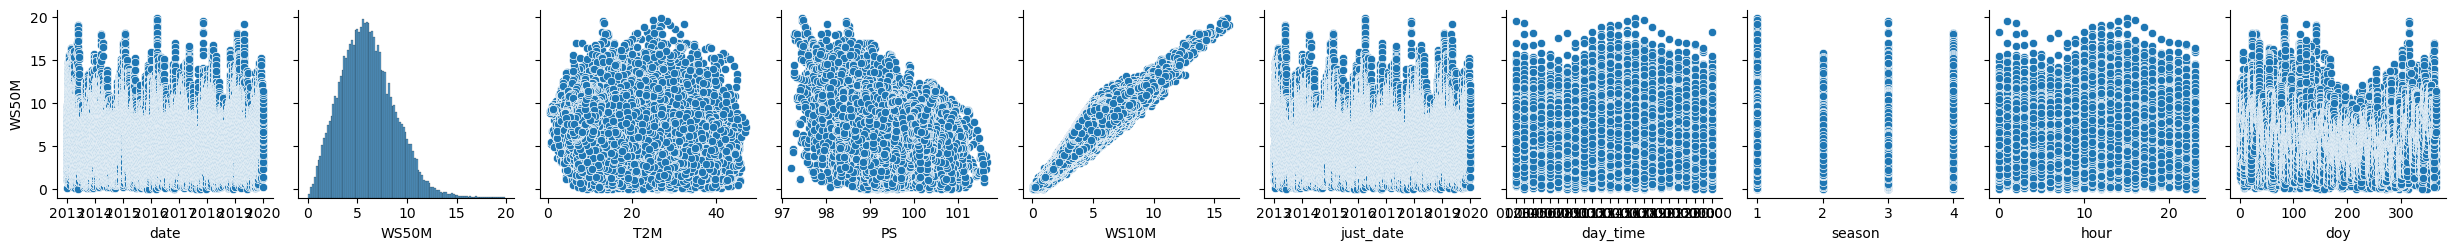

In [134]:
sns.pairplot(tataouine_df, y_vars=['WS50M'], x_vars=tataouine_df.columns[:], kind='scatter')

## Linear Regression

In [136]:
# creating & training the linear regression model
model = LinearRegression()
model.fit(X_train_norm, y_train)

LinearRegression()

In [138]:
# making predictions
y_pred = model.predict(X_test_norm)

In [140]:
# Step 6: Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("MAPE:", mape)
print("R² Score:", r2)

Root Mean Squared Error: 0.9757622347007935
MAPE: 0.18017690515396087
R² Score: 0.8708293541098073


In [142]:
# printing the model's coefficients
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [-8.38034266e-01 -3.53996688e-01  2.37505384e+00  1.14370873e-03
  9.31322549e-02  1.21124693e-01]
Intercept: 6.026396054937445


In [144]:
X_train.columns

Index(['T2M', 'PS', 'WS10M', 'season', 'hour', 'doy'], dtype='object')

In [148]:
tataouine_num_df['WS50M'].describe()

count    61343.000000
mean         6.022219
std          2.730085
min          0.040000
25%          4.050000
50%          5.830000
75%          7.760000
max         19.830000
Name: WS50M, dtype: float64

<Axes: >

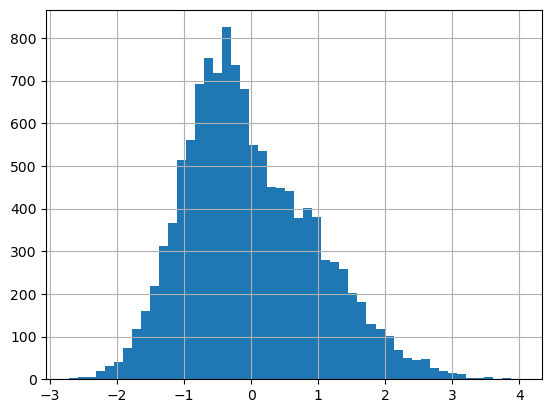

In [150]:
(y_test - y_pred).hist(bins=50)

<Axes: >

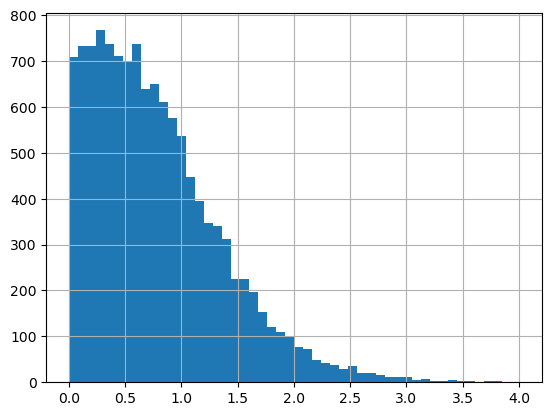

In [152]:
(y_test - y_pred).abs().hist(bins=50)

In [183]:
# from sklearn.metrics import mean_absolute_error
print(f"MAE {mean_absolute_error(y_pred, y_test): .2f}")

MAE  0.79


In [185]:
# Step 1: Evaluate the model on training data
y_train_pred = model.predict(X_train_norm)

# Calculate performance metrics on training data
rmse_train = root_mean_squared_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Step 2: Evaluate the model on testing data
y_test_pred = model.predict(X_test_norm)

# Calculate performance metrics on testing data
rmse_test = root_mean_squared_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Step 3: Print the results
print("Training Set Metrics:")
print("Root Mean Squared Error (Train):", rmse_train)
print("MAPE (Train):", mape_train)
print("R² Score (Train):", r2_train)

print("\nTesting Set Metrics:")
print("Root Mean Squared Error (Test):", rmse_test)
print("MAPE (Test):", mape_test)
print("R² Score (Test):", r2_test)

Training Set Metrics:
Root Mean Squared Error (Train): 0.9775815955583173
MAPE (Train): 0.18375964331196265
R² Score (Train): 0.8721298949725776

Testing Set Metrics:
Root Mean Squared Error (Test): 0.9757622347007935
MAPE (Test): 0.18017690515396087
R² Score (Test): 0.8708293541098073


## Decision Trees -> Random Forest
Follows similar steps like what we did in Linear Regression, but different model

In [ ]:
# target-features: remain the same for this model as what we did for linear regression

In [ ]:
# train-test split: also remains the same for this model

In [121]:
# same goes for the standarized values (which I called X_train_norm)

**OJO, if changes are made to the features, then it will impact this model too**   
so if you don't want that, then update the above code blocks

In [156]:
# initialize a random forest
forest = RandomForestRegressor(n_estimators=100, max_depth=20)

In [159]:
# train the model
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=20)

In [160]:
# making the predictions
pred = forest.predict(X_test_norm)

In [161]:
# evaluate the model
print(f"MAE, {mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE, {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score, {forest.score(X_test_norm, y_test): .2f}")

MAE,  0.28
RMSE,  0.42


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score,  0.98


In [162]:
# to calculate feature importance
rf_importance = {feature: importance for feature, importance in zip(X_train_norm.columns, forest.feature_importances_)}

In [163]:
for feature, importance in rf_importance.items():
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Feature: T2M, Importance: 0.0632
Feature: PS, Importance: 0.0085
Feature: WS10M, Importance: 0.8327
Feature: season, Importance: 0.0022
Feature: hour, Importance: 0.0774
Feature: doy, Importance: 0.0159
